In [146]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
df = pd.read_csv("/content/titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [148]:
df = df.drop(["PassengerId","Name","Ticket","Fare"], axis = 1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,male,34.5,0,0,NaN,Q
1,1,3,female,47.0,1,0,NaN,S
2,0,2,male,62.0,0,0,NaN,Q
3,0,3,male,27.0,0,0,NaN,S
4,1,3,female,22.0,1,1,NaN,S
...,...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,NaN,S
414,1,1,female,39.0,0,0,C105,C
415,0,3,male,38.5,0,0,NaN,S
416,0,3,male,NaN,0,0,NaN,S


In [149]:
label = LabelEncoder()
scaler = StandardScaler()

labels = ['Sex','Cabin','Embarked']
for i in labels:
  df[i] = label.fit_transform(df[i])
df = df.dropna()
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked
0,0,3,1,34.5,0,0,76,1
1,1,3,0,47.0,1,0,76,2
2,0,2,1,62.0,0,0,76,1
3,0,3,1,27.0,0,0,76,2
4,1,3,0,22.0,1,1,76,2
...,...,...,...,...,...,...,...,...
409,1,3,0,3.0,1,1,76,2
411,1,1,0,37.0,1,0,41,1
412,1,3,0,28.0,0,0,76,2
414,1,1,0,39.0,0,0,22,0


In [150]:
X, y = df.drop("Survived", axis =1), df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [151]:
NB = GaussianNB().fit(X_train, y_train)
y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


In [152]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_mat = pd.DataFrame(conf_matrix, index=["Survived","Not Survived"], columns = ["Survived", "Not Survived"])
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
              Survived  Not Survived
Survived            42             0
Not Survived         0            25


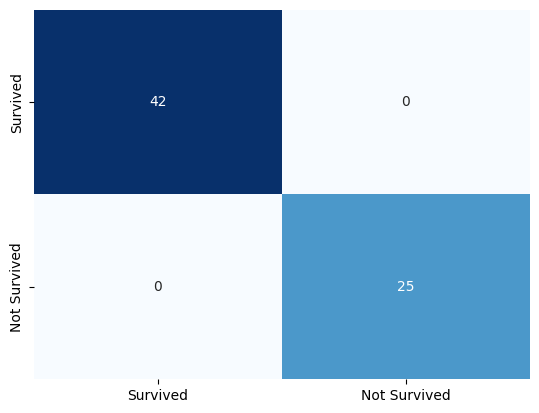

In [153]:
# plt.figure(figsize(6,2))
sns.heatmap(conf_mat, annot = True, cbar = False, cmap = "Blues")
plt.show()

In [154]:
new = NB.predict([[3,0,47,1,0,76,2]])
print(new)
new = NB.predict([[2,1,62,0,0,76,1]])
print(new)

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
